In [1]:
import numpy as np
import math
import os,sys,inspect
import random
import matplotlib.pyplot as plt
import pandas as pd

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from Algorithm_2 import Algorithm_2, GetCoFromEigen
from Algorithm_3 import Algorithm_3
from func.Select_Index import Select_Columns, Select_Rows, Select_Ind
from func.Summation_Alg import GetCoFromEigen
import warnings
warnings.filterwarnings('ignore')

import itertools 
from itertools import combinations, chain 

def findsubsets(r, n): 
    s = range(0, n)
    return list(itertools.combinations(s, r)) 

def Check_Best_CUR(A, k):
    
    ans = math.inf
    columns = []
    rows = []
    
    m = A.shape[0]
    n = A.shape[1]
    
    Cols = findsubsets(k, n)
    Rows = findsubsets(k, m)
    
    for col__ in Cols:
        for row__ in Rows:
            
            col = list(col__)
            row = list(row__)
            
            C  = Select_Columns(A, col)
            R  = Select_Rows(A, row)
            U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)
            
            norm = np.linalg.norm(A - C @ U @ R,'fro')
            if(norm < ans):
                ans = norm
                columns = col
                rows = row
            
    return ans, columns, rows

In [2]:
def GetHilbertTest(m,n, k_start,k_border):
    A = np.zeros((m,n))

    arrK2 = []
    arrE2 = []
    arrT2 = []

    arrK3 = []
    arrE3 = []
    arrT3 = []

    for i in range(m):
        for j in range(n):
            A[i][j] = 1/(i+j+1)
        
        
    for k in range(k_start,k_border+1):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_2(A, k)
        end = pd.Timestamp.now()
        print(k)
        arrK2.append(k)
        time = end - start
        arrT2.append(time.total_seconds())
        arrE2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
    for k in range(k_start,k_border+1):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_3(A, k)
        end = pd.Timestamp.now()
        #print(k)
        arrK3.append(k)
        time = end - start
        arrT3.append(time.total_seconds())
        arrE3.append(np.linalg.norm(A - C@U@R, 'fro'))
    return arrK2, arrE2, arrT2, arrK3, arrE3, arrT3


In [6]:
m = 20
n = 30

A = np.zeros((m,n))

arrK2 = []
arrE2 = []
arrT2 = []

arrK3 = []
arrE3 = []
arrT3 = []

for i in range(m):
    for j in range(n):
        A[i][j] = 1/(i+j+1)
        
        
for k in range(3, min(m, n)):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrK2.append(k)
    time = end - start
    arrT2.append(time.total_seconds())
    arrE2.append(np.linalg.norm(A - C@U@R, 'fro'))

for k in range(3 , min(m, n)):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrK3.append(k)
    time = end - start
    arrT3.append(time.total_seconds())
    arrE3.append(np.linalg.norm(A - C@U@R, 'fro'))

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [35]:
np.savetxt("arrK2_(20x30)_Hilbert.txt", arrK2, fmt="%s")
np.savetxt("arrT2_(20x30)_Hilbert.txt", arrT2, fmt="%s")
np.savetxt("arrE2_(20x30)_Hilbert.txt", arrE2, fmt="%s")

np.savetxt("arrK3_(20x30)_Hilbert.txt", arrK3, fmt="%s")
np.savetxt("arrT3_(20x30)_Hilbert.txt", arrT3, fmt="%s")
np.savetxt("arrE3_(20x30)_Hilbert.txt", arrE3, fmt="%s")

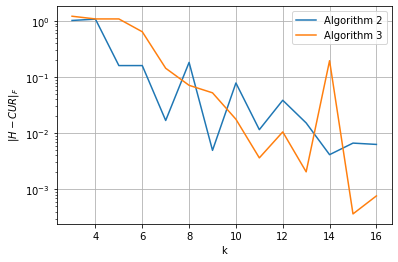

In [36]:
fig = plt.figure()
plt.plot(arrK2[0:min(n, m) - 6],arrE2[0:min(n, m) - 6], label = "Algorithm 2")
plt.plot(arrK3[0:min(n, m) - 6],arrE3[0:min(n, m) - 6], label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel(" $\|H - CUR\|_F$")
plt.xlabel("k")
plt.grid()
plt.savefig('err_Hilbert.pdf', dpi=300)
plt.show()

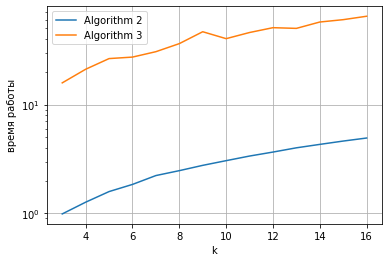

In [37]:
fig = plt.figure()
plt.plot(arrK2[0:min(n, m) - 6],arrT2[0:min(n, m) - 6], label = "Algorithm 2")
plt.plot(arrK3[0:min(n, m) - 6],arrT3[0:min(n, m) - 6], label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel("время работы")
plt.xlabel("k")
plt.grid()
plt.savefig('time_Hilbert.pdf', dpi=300)
plt.show()

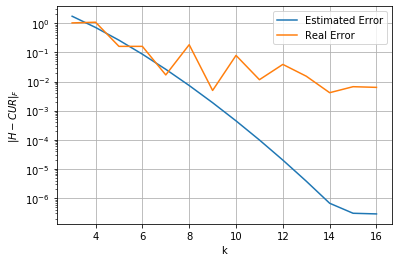

In [44]:
import math
U, Sig, VT = np.linalg.svd(A, False)

Est_2 = []
Est_3 = []  # теоретические оценки

for i in range(3, min(n, m)):
    res = math.sqrt(np.linalg.norm(Sig[i : min(n, m)]))
    Est_2.append(4* (i + 1) * res)
    Est_3.append((i + 1) * res )
    
    
fig = plt.figure()
plt.plot(arrK2[0:min(n, m) - 6],Est_2[0:min(n, m) - 6], label = "Estimated Error")
plt.plot(arrK2[0:min(n, m) - 6],arrE2[0:min(n, m) - 6], label = "Real Error")
plt.legend()

plt.yscale('log')
plt.ylabel("$\|H - CUR\|_F$")
plt.xlabel("k")
plt.grid()
plt.savefig('Est2_Hilbert.pdf', dpi=300)
plt.show()

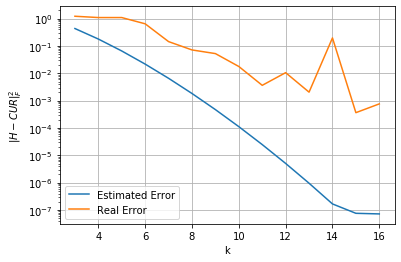

In [45]:
fig = plt.figure()
plt.plot(arrK2[0:min(n, m) - 6],Est_3[0:min(n, m) - 6], label = "Estimated Error")
plt.plot(arrK3[0:min(n, m) - 6],arrE3[0:min(n, m) - 6], label = "Real Error")
plt.legend()

plt.yscale('log')
plt.ylabel("$\|H - CUR\|_F^2$")
plt.xlabel("k")
plt.grid()
plt.savefig('Est3_Hilbert.pdf', dpi=300)
plt.show()